Calculating Averages
Averages computed now plotting


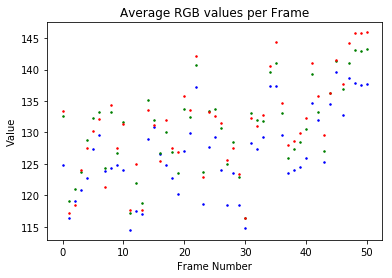

Now filtering averages and standard deviations


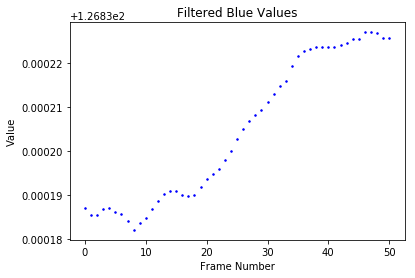

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.ndimage

#This code is based on the link below
#http://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/
def showFlattenedHist(image):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    features = []
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)
        plt.plot(hist, color = color)
        plt.xlim([0, 256])
    plt.show()
    print "flattened feature vector size: %d" % (np.array(features).flatten().shape)

def averageandstd(frameCount):
    #Create Lists to Store these values
    average_colours = np.zeros((frameCount+1, 3))
    std_dev_colours = np.zeros((frameCount+1, 3))
    print 'Calculating Averages'
    for i in range(0, frameCount+1):
        image = cv2.imread('C:\\Users\\Alex\\Documents\\Dissertation\\cleanedTimeLapseFrame\\image%0*d.jpg' %(4, i))
        #OpenCV sees colour values as BGR
        #Code based on this URL
        #http://miriamposner.com/classes/medimages/3-use-opencv-to-find-the-average-color-of-an-image/
        avg_colour_per_row = np.average(image, axis=0)
        avg_colour = np.average(avg_colour_per_row, axis=0)
        std_dev_per_row = np.std(image, axis=0)
        std_dev_colour = np.std(std_dev_per_row, axis = 0)
        #This tuple should be our avergage B, G, R values and std dev, fill some kind of data structure
        average_colours[i,0] = avg_colour[0]
        average_colours[i,1] = avg_colour[1]
        average_colours[i,2] = avg_colour[2]
        std_dev_colours[i,0] = std_dev_colour[0]
        std_dev_colours[i,1] = std_dev_colour[1]
        std_dev_colours[i,2] = std_dev_colour[2]
    print 'Averages computed now plotting'
    #Lets plot our averages and std_dev
    plotaveragesstd(average_colours, frameCount)
    #Now apply a low pass filter to colours and standard deviations
    print 'Now filtering averages and standard deviations'
    #First Filter B/G/R Values
    filtered_b = lowPassGaussianFilter(average_colours[:,0], frameCount)
    filtered_g = lowPassGaussianFilter(average_colours[:,1], frameCount)
    filtered_r = lowPassGaussianFilter(average_colours[:,2], frameCount)
    #Now Filter Standard Deviations
    plt.figure()
    plt.title("Filtered Blue Values")
    plt.xlabel("Frame Number")
    plt.ylabel("Value")
    for i in range(0, frameCount+1):
        plt.plot(i, filtered_b[i], marker='.', ms = 3, alpha=1, color='b')
    plt.show()
    #Now normalise and save values


def plotaveragesstd(average_colours, frameCount):
    plt.figure()
    plt.title("Average RGB values per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("Value")
    for i in range(0, frameCount+1):
        plt.plot(i, average_colours[i,0], marker='.', ms = 3, alpha=1, color='b')
        plt.plot(i, average_colours[i,1], marker='.', ms = 3, alpha=1, color='g')
        plt.plot(i, average_colours[i,2], marker='.', ms = 3, alpha=1, color='r')
    plt.show()

def lowPassGaussianFilter(inputlist, frameCount):
    filteredlist = np.zeros((frameCount+1))
    sigma = 1000
    scipy.ndimage.filters.gaussian_filter1d(inputlist, sigma, axis=-1, output = filteredlist, truncate=4.0)
    return filteredlist
    

#Read two images
#image1 = cv2.imread('C:\\Users\\Alex\\Documents\\Dissertation\\cleanedTimeLapseFrame\\image0000.jpg')
#image2 = cv2.imread('C:\\Users\\Alex\\Documents\\Dissertation\\cleanedTimeLapseFrame\\image0001.jpg')
#showFlattenedHist(image2)
#Now let's attempt to plot a basic histogram for the colour channels of this image
averageandstd(50)

